One way ANOVA (Analysis of Variance) is a technique for hypothesis testing. It is used to test whether the means of different group is really different.

In this example we will use the data-set, International football results from 1872 to 2019, which is available from the [Kaggle website](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

- Load libraries
- Load and explore data-set
- [The Hypothesis](#The-Hypothesis)
- [ANOVA](!ANOVA)

In [99]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

%matplotlib inline
matplotlib.style.use('fivethirtyeight')
rng = np.random.RandomState(201910)

In [100]:
%reload_ext watermark
%watermark -v -m --iversions

seaborn         0.9.0
statsmodels.api 0.10.1
scipy           1.3.1
numpy           1.17.3
matplotlib      3.1.1
pandas          0.25.2
CPython 3.7.2rc1
IPython 7.8.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


We are ready to load mentioned above data-set and explore it.

In [101]:
data = pd.read_csv('results.csv')

Getting sense of The data-set.

In [102]:
data.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40945 entries, 0 to 40944
Data columns (total 9 columns):
date          40945 non-null object
home_team     40945 non-null object
away_team     40945 non-null object
home_score    40945 non-null int64
away_score    40945 non-null int64
tournament    40945 non-null object
city          40945 non-null object
country       40945 non-null object
neutral       40945 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


Rebuild index as datetime from datetime column

In [104]:
data.index = pd.to_datetime(data.date)

In [105]:
data.index

DatetimeIndex(['1872-11-30', '1873-03-08', '1874-03-07', '1875-03-06',
               '1876-03-04', '1876-03-25', '1877-03-03', '1877-03-05',
               '1878-03-02', '1878-03-23',
               ...
               '2019-09-10', '2019-09-10', '2019-09-10', '2019-09-10',
               '2019-09-10', '2019-09-10', '2019-09-10', '2019-09-18',
               '2019-09-29', '2019-09-30'],
              dtype='datetime64[ns]', name='date', length=40945, freq=None)

In [106]:
data.shape

(40945, 9)

There are some types of tournament presented in this data-set.

In [107]:
data.tournament.unique()[:40]

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

# The Hypothesis

Getting the sense of the score distribution in world cup related tournaments

In [108]:
fifa_wc_data = data[data.tournament.isin(['FIFA World Cup', 'FIFA World Cup qualification'])]

In [109]:
fifa_wc_data.tournament.unique()

array(['FIFA World Cup', 'FIFA World Cup qualification'], dtype=object)

In [110]:
fifa_wc_data = fifa_wc_data.assign(score=fifa_wc_data.home_score - fifa_wc_data.away_score)

In [111]:
fifa_wc_data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
score          int64
dtype: object

In [112]:
fifa_wc_data.index

DatetimeIndex(['1930-07-13', '1930-07-13', '1930-07-14', '1930-07-14',
               '1930-07-15', '1930-07-16', '1930-07-17', '1930-07-17',
               '1930-07-18', '1930-07-19',
               ...
               '2018-07-03', '2018-07-03', '2018-07-06', '2018-07-06',
               '2018-07-07', '2018-07-07', '2018-07-10', '2018-07-11',
               '2018-07-14', '2018-07-15'],
              dtype='datetime64[ns]', name='date', length=8000, freq=None)

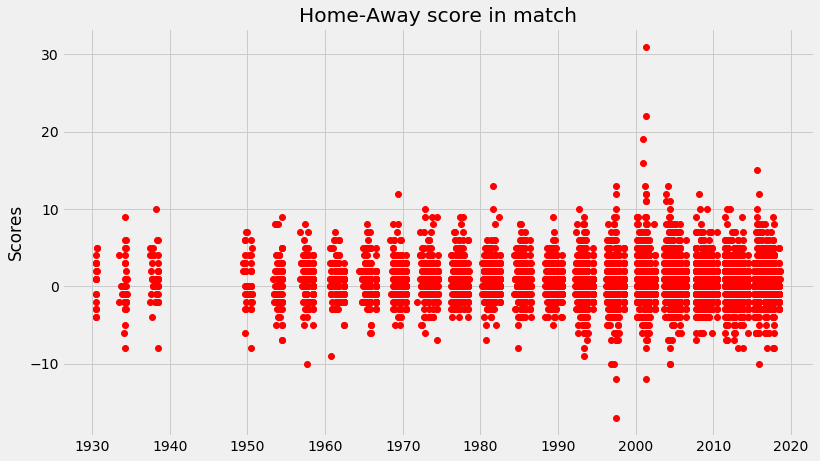

In [113]:
plt.figure(figsize=(12, 7))
plt.plot(fifa_wc_data['score'].index, fifa_wc_data['score'].values, 'ro', label = 'Home/Away `score` in match')
plt.ylabel("Scores")
plt.title("Home-Away score in match")
plt.show()

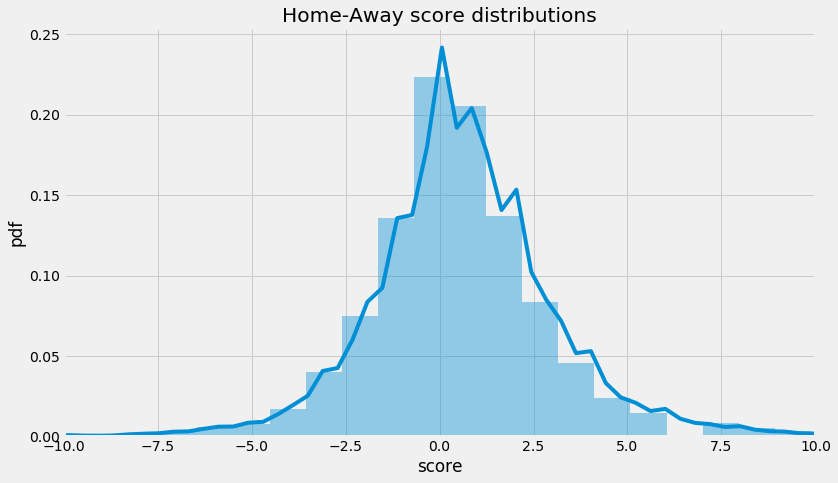

In [114]:
plt.figure(figsize=(12, 7))
plt.title('Home-Away score distributions')
plt.ylabel('pdf')
sns.distplot(fifa_wc_data.score)
plt.xlim(-10, 10)
plt.show()

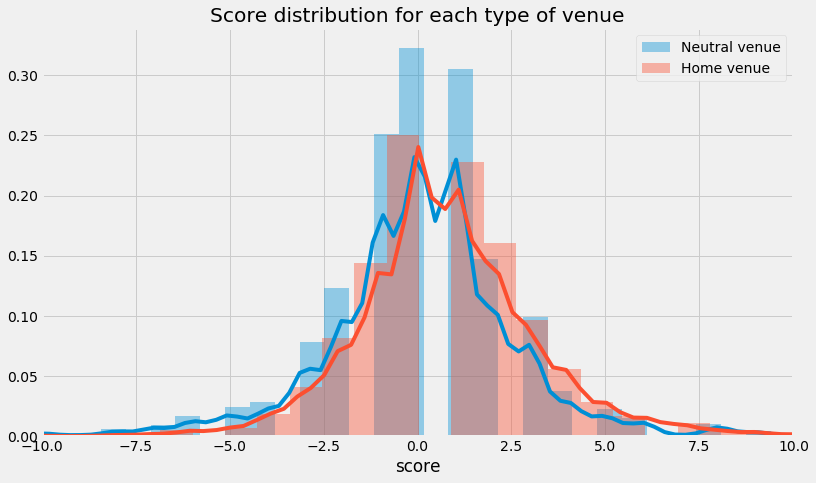

In [115]:
plt.figure(figsize=(12, 7))
sns.distplot(fifa_wc_data[fifa_wc_data.neutral == True].score, label='Neutral venue')
sns.distplot(fifa_wc_data[fifa_wc_data.neutral == False].score, label='Home venue')
plt.title('Score distribution for each type of venue')
plt.legend()
plt.xlim(-10, 10)
plt.show()

In [116]:
fifa_wc_data.groupby('neutral').agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).score

mean  median  count_nonzero       std
neutral                                           
False    0.790199       1           5238  2.461279
True     0.119819       0           1044  2.591020

In [117]:
fifa_wc_data.groupby(['neutral', 'tournament']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).score

mean  median  count_nonzero  \
neutral tournament                                                      
False   FIFA World Cup                0.915254       1             96   
        FIFA World Cup qualification  0.787948       1           5142   
True    FIFA World Cup                0.214834       0            605   
        FIFA World Cup qualification -0.016514       0            439   

                                           std  
neutral tournament                              
False   FIFA World Cup                1.972357  
        FIFA World Cup qualification  2.469257  
True    FIFA World Cup                2.036136  
        FIFA World Cup qualification  3.221838

We can see difference in score on home venue against neutral.

# ANOVA

The 1 way anova’s null hypothesis is $μ_{score_{neutral}} = μ_{score_{nome}}$

and this tests tries to see if it is true or not true

let’s assume that we have initially determine our confidence level of 99.99%, which means that we will accept 0.01% error rate.

In [118]:
mod = ols('score ~ neutral', fifa_wc_data[fifa_wc_data.tournament=='FIFA World Cup']).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for FIFA World Cup')
print('----------------------')
print(anova_table)
print()

mod = ols('score ~ neutral', fifa_wc_data[fifa_wc_data.tournament=='FIFA World Cup qualification']).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for FIFA World Cup qualification')
print('----------------------')
print(anova_table)

ANOVA table for FIFA World Cup
----------------------
               sum_sq     df          F    PR(>F)
neutral     50.299529    1.0  12.230771  0.000493
Residual  3693.060471  898.0        NaN       NaN

ANOVA table for FIFA World Cup qualification
----------------------
                sum_sq      df          F        PR(>F)
neutral     325.628045     1.0  50.677575  1.195318e-12
Residual  45608.099279  7098.0        NaN           NaN


There are two p-values(PR(>F)) that we can see here, world cup itself and qualification games.

For World Cup, we cannot accept the null hypothesis under 99.99% confident level, because the p-value is greater than our alpha (0.0001 < 0.000493). So home venue is not enough factor at final round.

For qualification, since the p-value PR(>F) is less than our error rate (0.0001 > 1.195318e-12), we could reject the null hypothesis. This means we are quite confident that there is a different in score for qualification games by venues types.